Importing the iris data from skearn api

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

Check what fields are given and explore the dataset

In [3]:
for ch in iris:
    print(ch)

data
target
target_names
DESCR
feature_names


In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

Importing various libraries like sklearn, numpy, pandas

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Adding the target column that uses target names and adding the original target column with numerical values

In [8]:
iris
ir = pd.DataFrame(iris['data'], columns = iris['feature_names'])
ir['target_names'] = iris['target_names'][iris['target']]
ir['target'] = iris['target']

What is the average/max/min/standard deviation sepal width for each type of species. 

The dataset contains three different species setosa, versicolor, virginica. Creating summary statistics for all three using the describe() function. Another way would be to use the groupby() function.

In [9]:
print("Setosa Summary statistics")
ir[ir['target_names'] == 'setosa']['sepal width (cm)'].describe()

Setosa Summary statistics


count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal width (cm), dtype: float64

In [10]:
print("Versicolor Summary statistics")
ir[ir['target_names'] == 'versicolor']['sepal width (cm)'].describe()

Versicolor Summary statistics


count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal width (cm), dtype: float64

In [11]:
print("Virginica Summary statistics")
ir[ir['target_names'] == 'virginica']['sepal width (cm)'].describe()

Virginica Summary statistics


count    50.000000
mean      2.974000
std       0.322497
min       2.200000
25%       2.800000
50%       3.000000
75%       3.175000
max       3.800000
Name: sepal width (cm), dtype: float64

Finding the dimension of a subset with only “Iris-setosa” and “Iris-virginica”. This contains all 6 columns which includes 4 columns of the data plus target and target_names column

In [12]:
ir[(ir['target_names'] == 'setosa') | (ir['target_names'] == 'virginica')].shape

(100, 6)

Creating a new column that stores the logical values where sepal width is greater than half of sepal length. Checking the number of records which have the new column value as true. 

In [13]:
ir['logical_values'] = ir['sepal width (cm)'] > (ir['sepal length (cm)']/2)
len(ir[ir['sepal width (cm)'] > (ir['sepal length (cm)']/2)])

66

## SKlearn K-Means

In [14]:
train = np.array(ir[iris['feature_names']])
ssdist = []
for x in range(1,10):
    kmeans = KMeans(n_clusters= int(x), random_state=0).fit(train)
    ssdist.append(kmeans.inertia_)

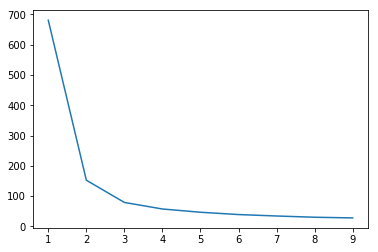

In [15]:
plt.plot(range(1,10),ssdist)

## Answer: Choosing 3 as the cluster number

## What do the plots look like with different clusters

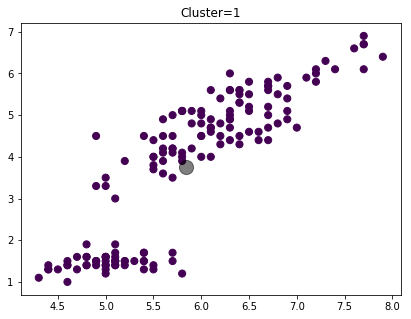

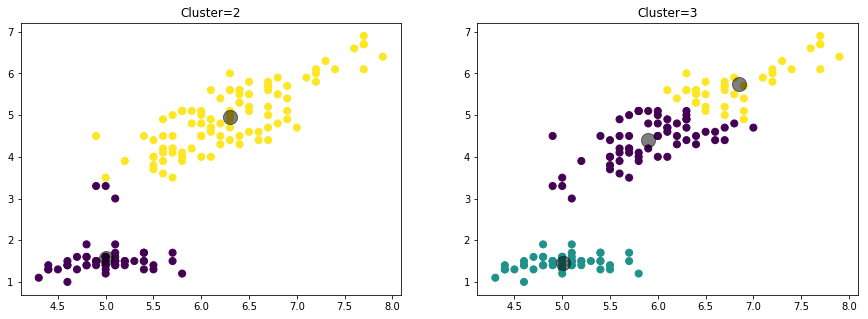

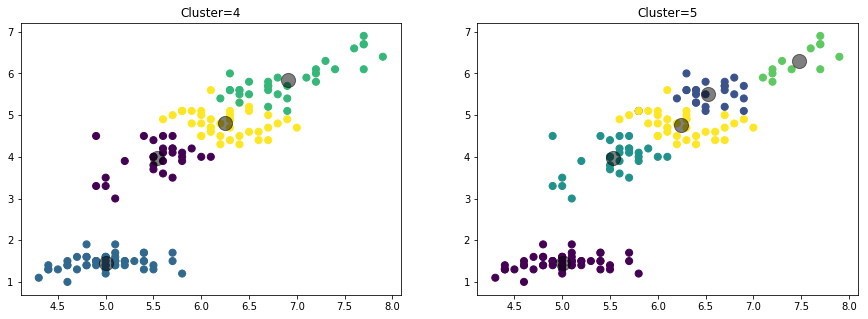

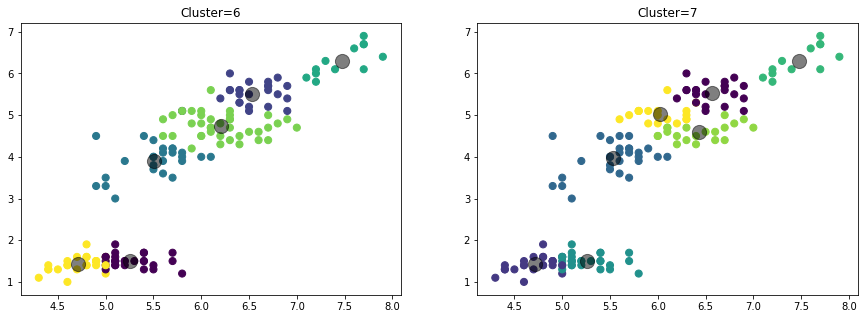

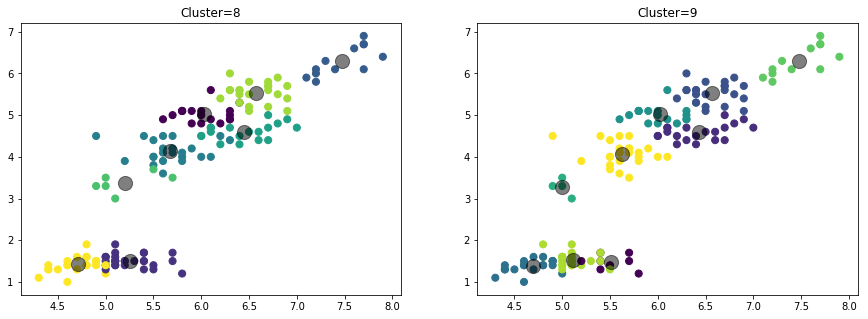

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
for x in range(1,10):
    kmeans = KMeans(n_clusters= int(x), random_state=0).fit(train)
    plt.figure(x//2 - 1)
    plt.subplot(1,2,(x%2 + 1))
    plt.scatter(train[:, 0], train[:, 2], c=kmeans.predict(train), s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
    plt.title("Cluster="+str(x))